# DigitalSentinel: Cybercrime Analytics Project
This notebook demonstrates the end-to-end process of analyzing and predicting cybercrime incidents using machine learning.

### Objectives:
1. Conduct exploratory data analysis (EDA) to understand key factors influencing cybercrime risks.
2. Implement machine learning models (Logistic Regression and Random Forest) to predict risk levels.
3. Build visualizations to identify trends and high-risk areas.

### Skills Used:
- Python
- Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn
- Predictive Analytics

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
file_path = 'C:\Sclr_2022\Case_study\CyberCrime Analytics\DigitalSentinel_Cybercrime_Analytics.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

C:\Users\singh\AppData\Local\Temp\ipykernel_14724\1338664435.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Incident_ID,Date,Time,Location,Attack_Type,Target_Industry,Severity,Attack_Vector,Impact_Cost,Resolved_Time,Risk_Level,Prevention_Measures
0,1,2023-02-23,18:57,Berlin,Malware,Technology,Low,Malware,204145.52,29,Low,No
1,2,2020-02-14,19:44,Sydney,DDoS,Healthcare,Low,Malware,937469.52,62,Low,No
2,3,2021-05-09,01:22,Berlin,Spyware,Government,Low,Email,68184.60,22,High,Yes
3,4,2021-02-05,02:26,Singapore,Ransomware,Retail,High,Social Engineering,159738.83,14,High,Yes
4,5,2023-08-16,19:47,Mumbai,DDoS,Healthcare,High,Malware,793882.60,63,High,Yes


## Exploratory Data Analysis (EDA)
Analyze the data to identify patterns and key factors influencing cybercrime risks.

In [2]:
# Display basic dataset information
print(data.info())
print(data.describe())

# Convert 'Date' to datetime and extract features
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop original 'Date' column if not needed
data = data.drop(columns=['Date'])

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Incident_ID          10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Time                 10000 non-null  object 
 3   Location             10000 non-null  object 
 4   Attack_Type          10000 non-null  object 
 5   Target_Industry      10000 non-null  object 
 6   Severity             10000 non-null  object 
 7   Attack_Vector        10000 non-null  object 
 8   Impact_Cost          10000 non-null  float64
 9   Resolved_Time        10000 non-null  int64  
 10  Risk_Level           10000 non-null  object 
 11  Prevention_Measures  10000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 937.6+ KB
None
       Incident_ID    Impact_Cost  Resolved_Time
count  10000.00000   10000.000000   10000.000000
mean    5000.50000  50510

### Distribution of attack types

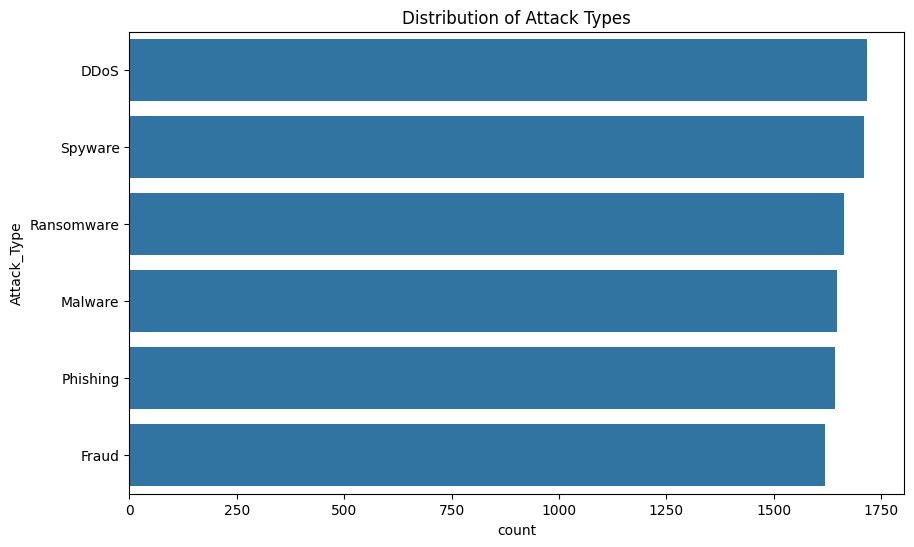

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Attack_Type', data=data, order=data['Attack_Type'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.show()


### Distribution of Severity Levels

C:\Users\singh\AppData\Local\Temp\ipykernel_14724\852398444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=data, palette='cool')


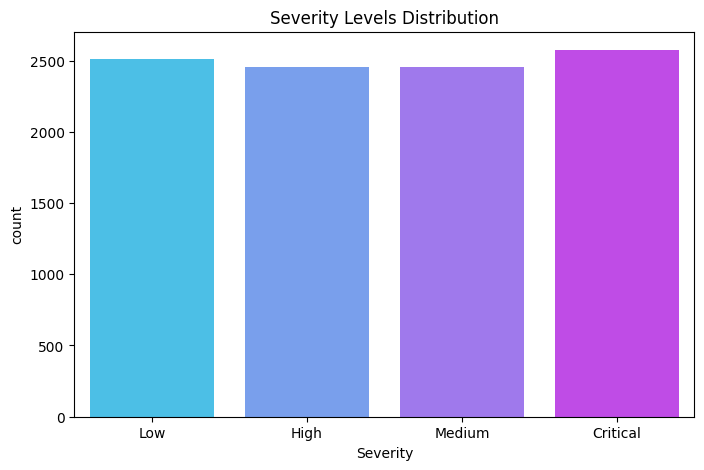

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=data, palette='cool')
plt.title('Severity Levels Distribution')
plt.show()


### Analysis of Risk Levels by Location

<Figure size 1200x800 with 0 Axes>

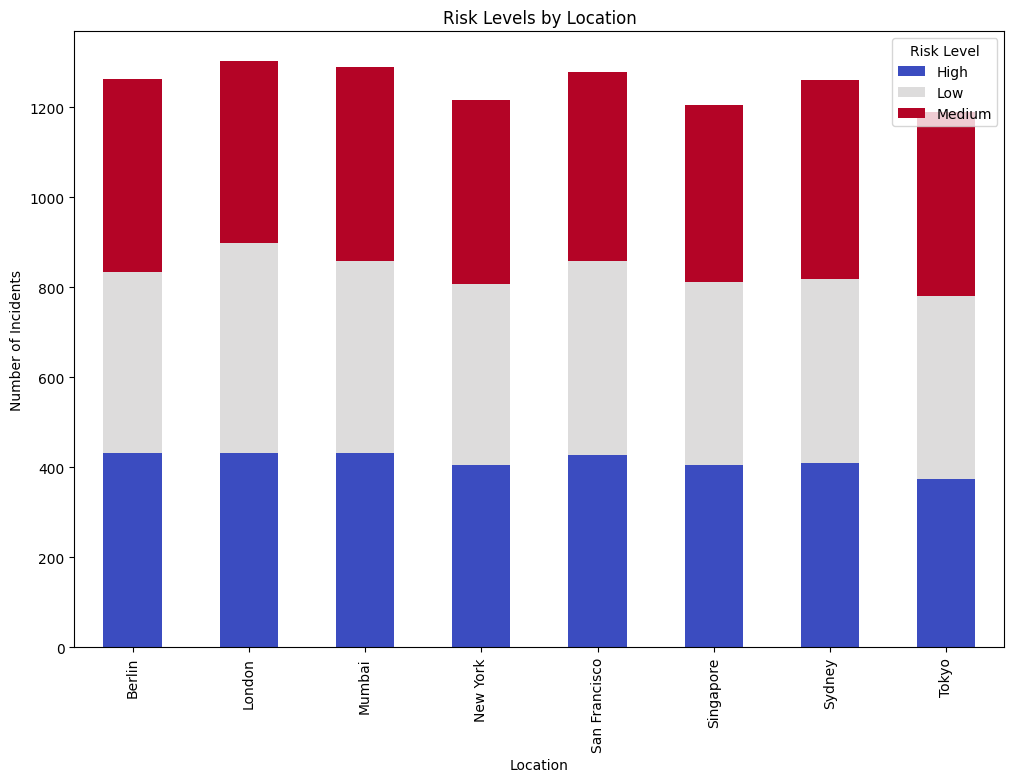

In [5]:
plt.figure(figsize=(12, 8))
location_risk = data.groupby(['Location', 'Risk_Level']).size().unstack()
location_risk.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Risk Levels by Location')
plt.xlabel('Location')
plt.ylabel('Number of Incidents')
plt.legend(title='Risk Level')
plt.show()


### Correlation Analysis

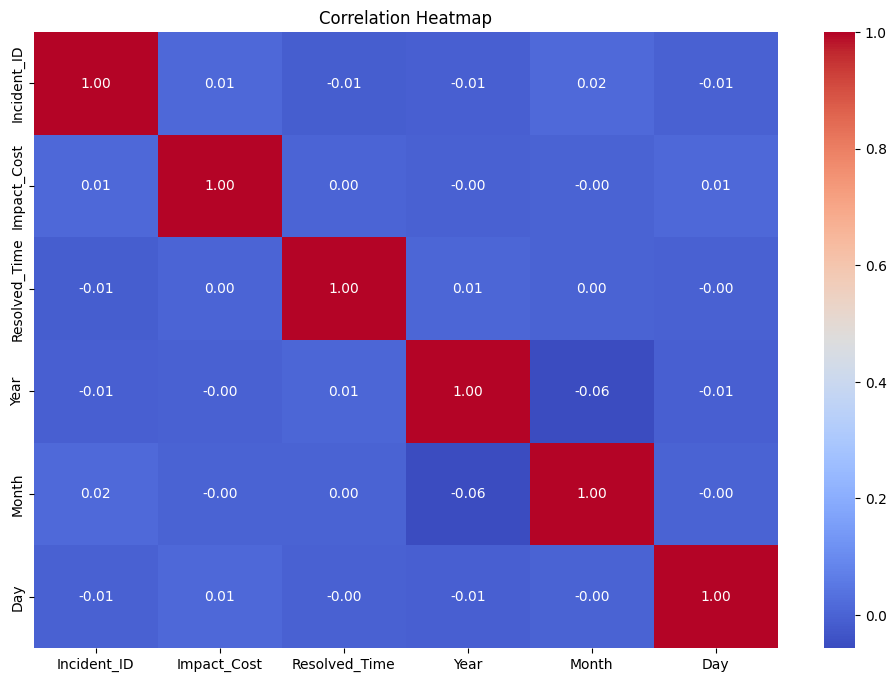

In [6]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Compute and plot the correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Trends Over Time

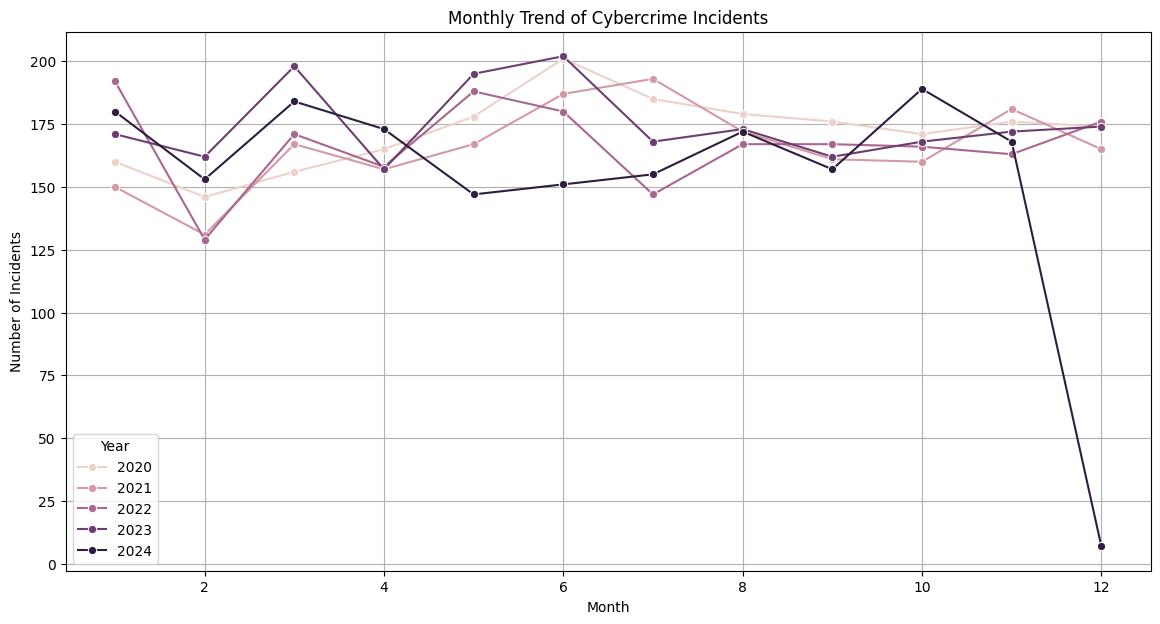

In [7]:
# Group by year and month for incident counts
monthly_trends = data.groupby(['Year', 'Month']).size().reset_index(name='Incident_Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='Month', y='Incident_Count', hue='Year', marker='o')
plt.title('Monthly Trend of Cybercrime Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid()
plt.show()


### Analyze Impact Costs

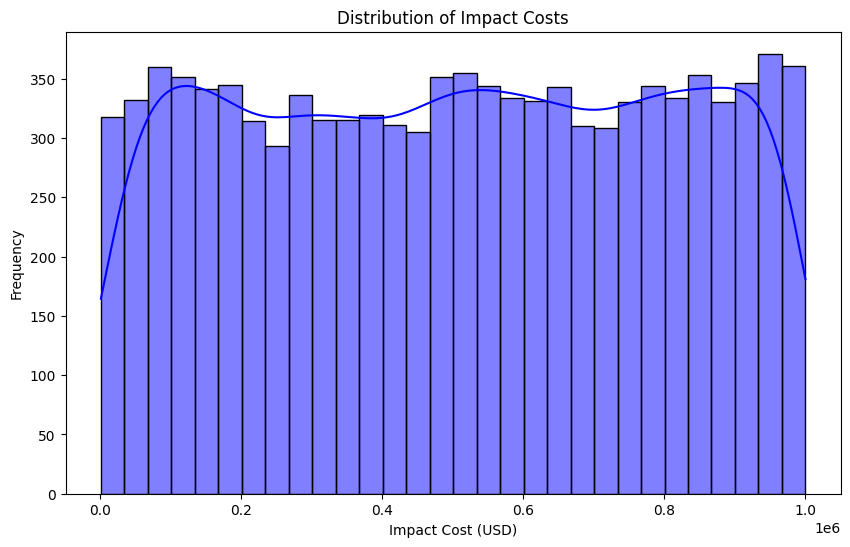

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Impact_Cost'], kde=True, bins=30, color='blue')
plt.title('Distribution of Impact Costs')
plt.xlabel('Impact Cost (USD)')
plt.ylabel('Frequency')
plt.show()


### Implementing Classification algorithm

### 1. Logistic regression

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Risk_Level' (Low, Medium, High)
label_encoder = LabelEncoder()
data['Risk_Level'] = label_encoder.fit_transform(data['Risk_Level'])

# One-Hot Encoding for categorical features
data_encoded = pd.get_dummies(data, columns=['Location', 'Attack_Type', 'Target_Industry', 'Severity', 'Attack_Vector'], drop_first=True)

# Drop unnecessary columns
X = data_encoded.drop(columns=['Risk_Level'])
y = data_encoded['Risk_Level']


#### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (7000, 31)
Testing Features Shape: (3000, 31)


### Train and Evaluate Logistic Regression

In [11]:
# Convert 'Time' to minutes past midnight
data['Time_in_Minutes'] = data['Time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Drop the original 'Time' column
data = data.drop(columns=['Time'])


In [12]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder



# Encode the 'Prevention_Measures' column ('Yes'/'No')
data['Prevention_Measures'] = data['Prevention_Measures'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for categorical features
categorical_columns = ['Location', 'Attack_Type', 'Target_Industry', 'Severity', 'Attack_Vector']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Encode the target variable 'Risk_Level'
label_encoder = LabelEncoder()
data_encoded['Risk_Level'] = label_encoder.fit_transform(data_encoded['Risk_Level'])

# Define feature matrix (X) and target variable (y)
X = data_encoded.drop(columns=['Risk_Level'])
y = data_encoded['Risk_Level']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dataset preprocessing completed. Shapes of training and testing sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Dataset preprocessing completed. Shapes of training and testing sets:
X_train: (7000, 31) X_test: (3000, 31)


Logistic Regression Accuracy: 0.321
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.05      0.09      1044
           1       0.32      0.40      0.35       987
           2       0.33      0.53      0.40       969

    accuracy                           0.32      3000
   macro avg       0.32      0.33      0.28      3000
weighted avg       0.32      0.32      0.28      3000



C:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


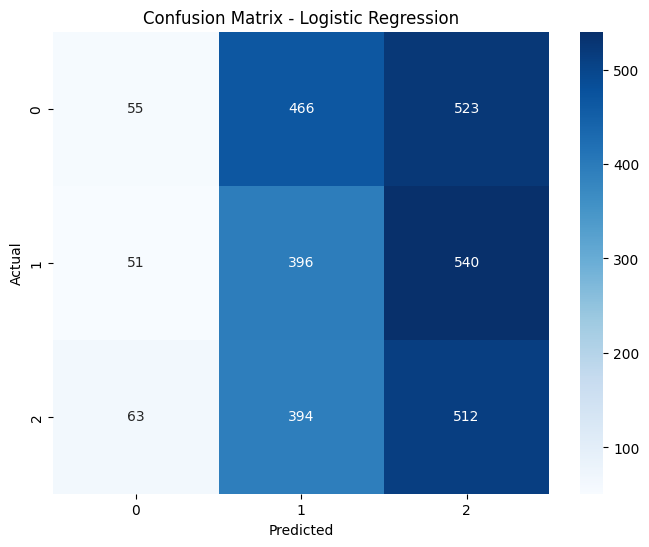

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Random Forest Classifier

In [15]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd



# One-Hot Encoding for categorical features
categorical_columns = ['Location', 'Attack_Type', 'Target_Industry', 'Severity', 'Attack_Vector']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Encode the target variable 'Risk_Level'
label_encoder = LabelEncoder()
data_encoded['Risk_Level'] = label_encoder.fit_transform(data_encoded['Risk_Level'])

# Define feature matrix (X) and target variable (y)
X = data_encoded.drop(columns=['Risk_Level'])
y = data_encoded['Risk_Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)


Random Forest Accuracy: 0.328
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.29      0.31      1044
           1       0.33      0.35      0.34       987
           2       0.32      0.35      0.33       969

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



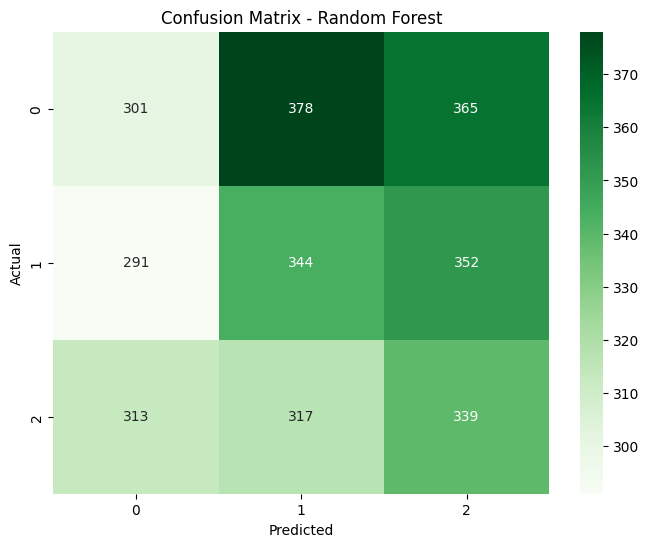

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_scaled, y_train_balanced)

# Predict on test data
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
